In [17]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [18]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [19]:
tips = sns.load_dataset('tips')

In [20]:
data = tips

In [21]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [22]:
data=data.drop('sex',axis=1)

In [23]:
data=data.drop('smoker',axis=1)

In [24]:
data=data.drop('day',axis=1)

In [25]:
data=data.drop('time',axis=1)

In [26]:
data=data.drop('size',axis=1)

In [27]:
data

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
...,...,...
239,29.03,5.92
240,27.18,2.00
241,22.67,2.00
242,17.82,1.75


In [28]:
x = data.values[:,0]
y = data.values[:,1]

Text(0, 0.5, 'tip')

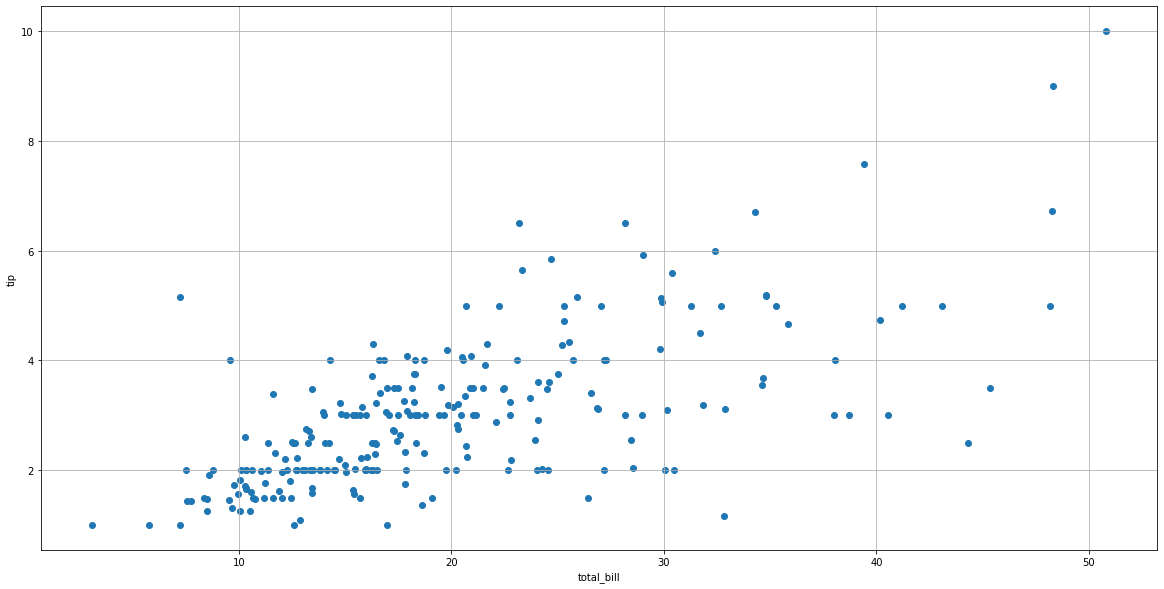

In [29]:
plt.figure(figsize=(20,10))
plt.scatter(x,y)
plt.grid()
plt.xlabel('total_bill')
plt.ylabel('tip')

In [30]:
model = linear_model.LinearRegression()
model.fit(x.reshape(len(x),1),y)

LinearRegression()

In [31]:

p = x.reshape(-1, 1)
model_predict = model.predict(p)
print("Mean square error ",mean_squared_error(y,model_predict))

Mean square error  1.036019442011377


# Ridge Regression

coef  [0.10002335]
intercept  1.0192224266484784


/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Text(0, 0.5, 'predicted tip ')

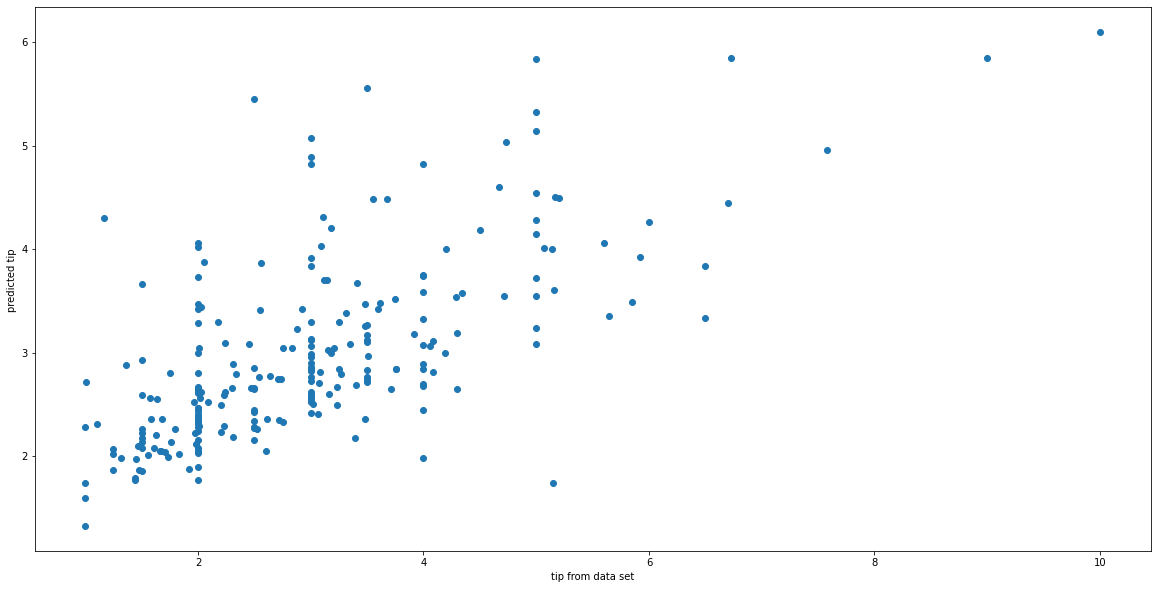

In [32]:
plt.figure(figsize=(20,10))
ridge_reg = linear_model.Ridge(normalize=True,alpha=0.05)
ridge_reg.fit(p,y)
print('coef ', ridge_reg.coef_)
print('intercept ',ridge_reg.intercept_)
ridge_predicted = ridge_reg.predict(p)
plt.scatter(y,ridge_predicted)
plt.xlabel("tip from data set")
plt.ylabel("predicted tip ")



In [33]:
from sklearn.metrics import r2_score
print("R squared value ",r2_score(y,ridge_predicted))

R squared value  0.4555811745912418


# Lasso Regression


coef  [0.08744208]
intercept  1.2681546490583788


/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Text(0, 0.5, 'predicted tip ')

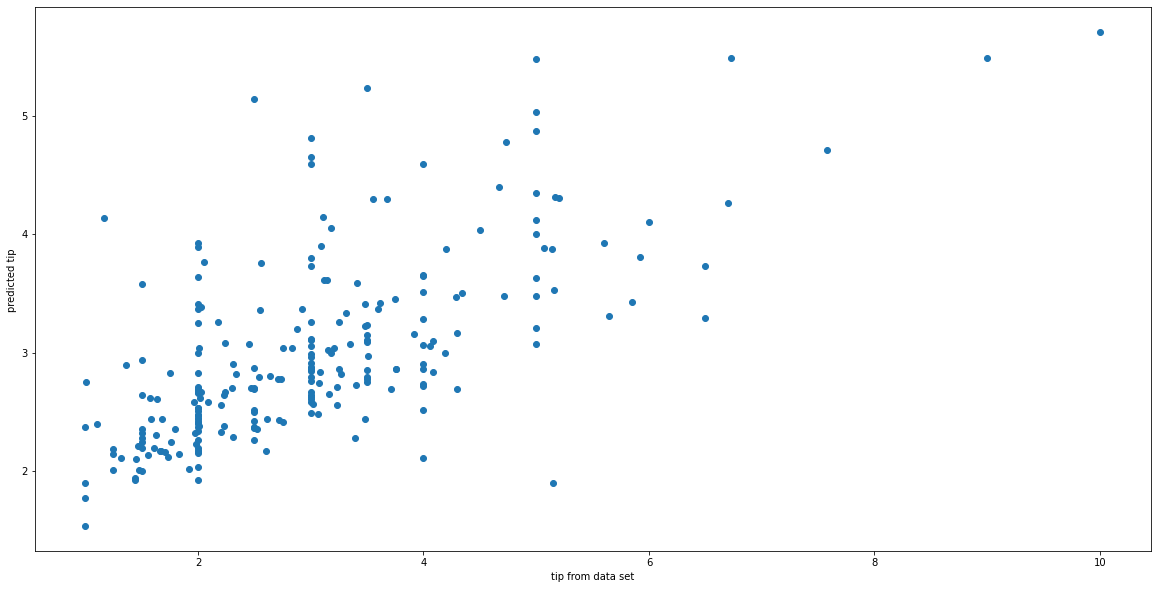

In [34]:
plt.figure(figsize=(20,10))
lasso_reg = linear_model.Lasso(normalize=True,alpha=0.01)
lasso_reg.fit(p,y)
print('coef ', lasso_reg.coef_)
print('intercept ',lasso_reg.intercept_)
lasso_predicted = lasso_reg.predict(p)
plt.scatter(y,lasso_predicted)
plt.xlabel("tip from data set")
plt.ylabel("predicted tip ")

In [35]:
from sklearn.metrics import r2_score
print("R squared value ",r2_score(y,lasso_predicted))

R squared value  0.44381899322226737
